# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import urllib

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
print(citipy)


<module 'citipy.citipy' from 'c:\\Users\\rober\\anaconda3\\envs\\RUTDataViz2023\\lib\\site-packages\\citipy\\citipy.py'>


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print (cities)

Number of cities in the list: 613
['ushuaia', 'kruisfontein', 'alekseyevsk', 'caborca', 'tasbuget', 'canutama', 'xining', 'fukue', 'airai', 'tuatapere', 'bur gabo', 'jamestown', 'punta arenas', 'arraial do cabo', 'mys shmidta', 'kungurtug', 'mataura', 'san patricio', 'bluff', 'sentyabrskiy', 'ekibastuz', 'grand river south east', 'taolanaro', 'prince rupert', 'new norfolk', 'rikitea', 'lavrentiya', 'port elizabeth', 'namibe', 'saint-pierre', 'asosa', 'grand gaube', 'chuy', 'atuona', 'inhambane', 'albany', 'koslan', 'porto novo', 'juegang', 'hobart', 'fortuna', 'qurayyat', 'havoysund', 'worland', 'tsihombe', 'gerash', 'victoria', 'havelock', 'arlit', 'mahebourg', 'mount gambier', 'busselton', 'pisco', 'ribeira grande', 'georgetown', 'yellowknife', 'cape town', 'bredasdorp', 'illoqqortoormiut', 'lambarene', 'saint-philippe', 'kuala terengganu', 'port lincoln', 'churapcha', 'dwarka', 'tasiilaq', 'inirida', 'maralal', 'panacan', 'zuidhorn', 'kahului', 'mehamn', 'samusu', 'luderitz', 'ancud

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
        city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | kruisfontein
Processing Record 3 of Set 1 | alekseyevsk
Processing Record 4 of Set 1 | caborca
Processing Record 5 of Set 1 | tasbuget
City not found. Skipping...
Processing Record 6 of Set 1 | canutama
Processing Record 7 of Set 1 | xining
Processing Record 8 of Set 1 | fukue
Processing Record 9 of Set 1 | airai
Processing Record 10 of Set 1 | tuatapere
Processing Record 11 of Set 1 | bur gabo
City not found. Skipping...
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 16 of Set 1 | kungurtug
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | san patricio
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | sentyabrskiy
City not found. Skipping...

In [8]:
print (city_data)

[{'City': 'ushuaia', 'Lat': -54.8, 'Lng': -68.3, 'Max Temp': 283.96, 'Humidity': 54, 'Cloudiness': 40, 'Wind Speed': 2.06, 'Country': 'AR', 'Date': 1680291061}, {'City': 'kruisfontein', 'Lat': -34.0033, 'Lng': 24.7314, 'Max Temp': 286.97, 'Humidity': 85, 'Cloudiness': 0, 'Wind Speed': 0.93, 'Country': 'ZA', 'Date': 1680291062}, {'City': 'alekseyevsk', 'Lat': 57.8406, 'Lng': 108.3492, 'Max Temp': 258.87, 'Humidity': 97, 'Cloudiness': 100, 'Wind Speed': 1.63, 'Country': 'RU', 'Date': 1680291062}, {'City': 'caborca', 'Lat': 30.5838, 'Lng': -111.101, 'Max Temp': 293.74, 'Humidity': 13, 'Cloudiness': 82, 'Wind Speed': 0.54, 'Country': 'MX', 'Date': 1680291062}, {'City': 'canutama', 'Lat': -6.5339, 'Lng': -64.3831, 'Max Temp': 300.72, 'Humidity': 86, 'Cloudiness': 94, 'Wind Speed': 1.11, 'Country': 'BR', 'Date': 1680291063}, {'City': 'xining', 'Lat': 36.6167, 'Lng': 101.7667, 'Max Temp': 279.17, 'Humidity': 34, 'Cloudiness': 87, 'Wind Speed': 0.16, 'Country': 'CN', 'Date': 1680291063}, {'Cit

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame (city_data)

# Show Record Count
city_data_df.count()


City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [10]:
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,283.96,54,40,2.06,AR,1680291061
1,kruisfontein,-34.0033,24.7314,286.97,85,0,0.93,ZA,1680291062
2,alekseyevsk,57.8406,108.3492,258.87,97,100,1.63,RU,1680291062
3,caborca,30.5838,-111.1010,293.74,13,82,0.54,MX,1680291062
4,canutama,-6.5339,-64.3831,300.72,86,94,1.11,BR,1680291063


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,283.96,54,40,2.06,AR,1680291061
1,kruisfontein,-34.0033,24.7314,286.97,85,0,0.93,ZA,1680291062
2,alekseyevsk,57.8406,108.3492,258.87,97,100,1.63,RU,1680291062
3,caborca,30.5838,-111.1010,293.74,13,82,0.54,MX,1680291062
4,canutama,-6.5339,-64.3831,300.72,86,94,1.11,BR,1680291063


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

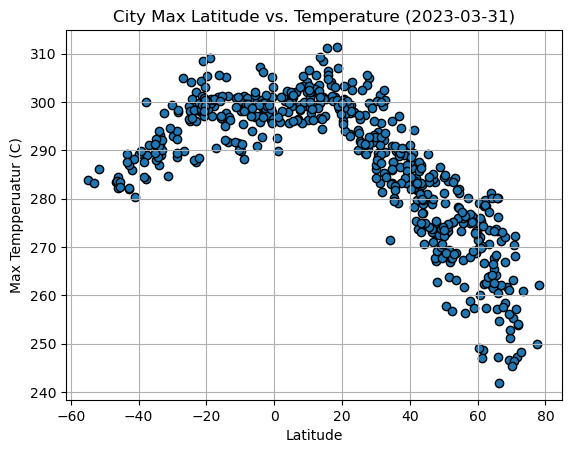

In [27]:
# Build scatter plot for latitude vs. temperature
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Max Temp"], marker="o",edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Tempperuatur (C)")
plt.title("City Max Latitude vs. Temperature (2023-03-31)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

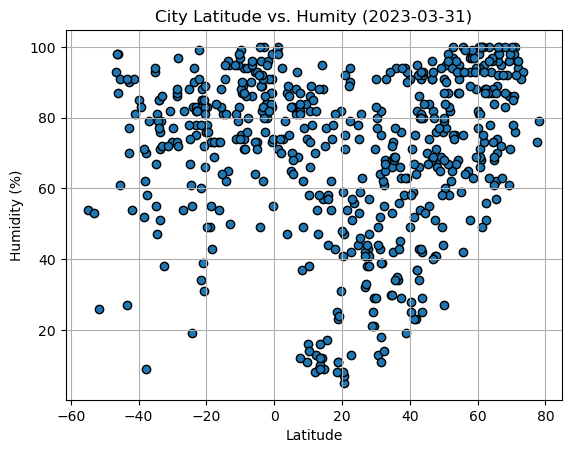

In [32]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Humidity"], marker="o",edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humity (2023-03-31)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

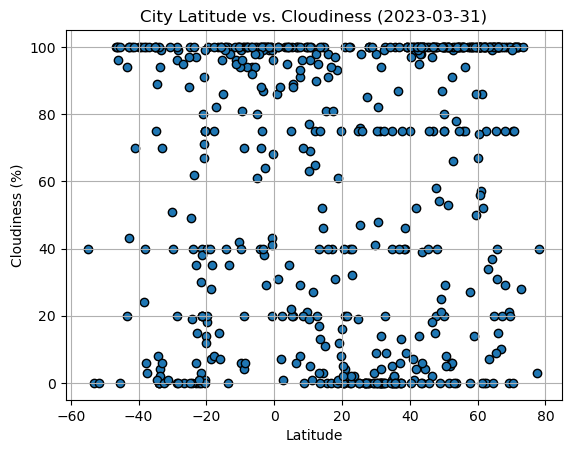

In [31]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Cloudiness"], marker="o",edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-03-31)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

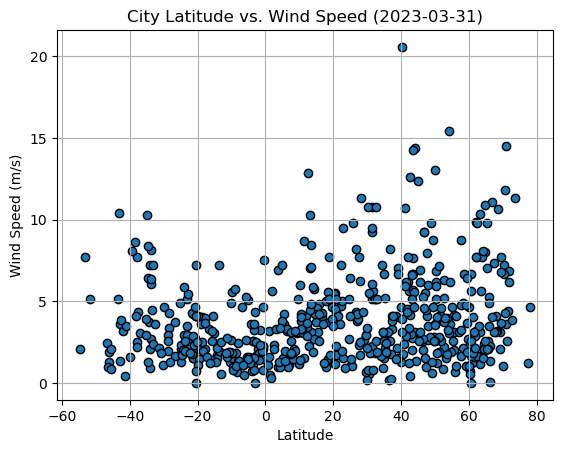

In [34]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Wind Speed"], marker="o",edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-03-31)")
plt.grid(True)
# Save the figu

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x=city_data_df["Lat"], y=city_data_df["Lng"])
regress_values = city_data_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


In [38]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,alekseyevsk,57.8406,108.3492,258.87,97,100,1.63,RU,1680291062
3,caborca,30.5838,-111.1010,293.74,13,82,0.54,MX,1680291062
5,xining,36.6167,101.7667,279.17,34,87,0.16,CN,1680291063
6,fukue,32.6881,128.8419,289.61,68,100,1.91,JP,1680291064
9,jamestown,42.0970,-79.2353,281.88,95,100,6.17,US,1680290874


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,283.96,54,40,2.06,AR,1680291061
1,kruisfontein,-34.0033,24.7314,286.97,85,0,0.93,ZA,1680291062
4,canutama,-6.5339,-64.3831,300.72,86,94,1.11,BR,1680291063
7,airai,-8.9266,125.4092,288.16,94,100,1.03,TL,1680291064
8,tuatapere,-46.1333,167.6833,284.46,87,96,1.90,NZ,1680291064


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.7854329700688262


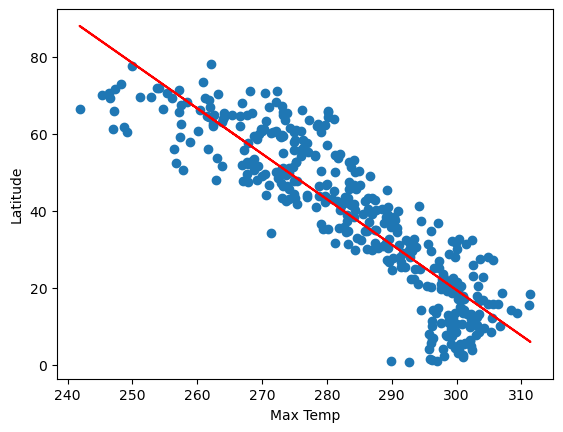

In [42]:
# Linear regression on Northern Hemisphere
# Run linear regression
x_values = northern_hemi_df["Max Temp"]
y_values = northern_hemi_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# Label plot
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
# Print r square value
print(f"R squared: {rvalue**2}")
# Show plot
plt.show()


In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE